In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
import numpy as np
import time
from IPython.display import display, clear_output
import random

# Load data

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

# Kmeans clustering class

In [161]:
class kMeansClustering:
    def __init__(self, n_cluster,  n_iterations):
        self.n_cluster,self.n_iterations = n_cluster,  n_iterations
    
    
    def euclidean(self,x1, x2):
        dist = np.linalg.norm(x1- x2)
        return dist
    
    def fit(self, X_data, plot=False, index_plot=[0,1]):
        '''
        X_data (numpy 2d array): dataset
        plot (binary)          : plot during fit?
        index_plot (list)      : which of the feature to plot in 2d
        '''
        n_features = X_data.shape[1]
        # Step 1 randomly initialize cetroids
        # this step can be done with taking n specific entry as a whole rather initializing two component independently
        #mu =  [np.array([random.choice(X_data[:,i]) for i in range(n_features)]) for j in range(self.n_cluster)]
        mu =  [np.array([X_data[random.randrange(len(X_data))]]) for j in range(self.n_cluster)]
        
        for nstep in range(self.n_iterations):
            # Step 2: assign the cluster
            distances = [[self.euclidean(i, j) for j in mu] for i in X_data] 
            ci = [k.index(min(k)) for k in distances]
            mu_ci = [mu[k] for k in ci]

            # Step 3: calculate the centriod
            mu = [np.mean([list(X_data[i,:]) for i in range(len(ci)) if ci[i]==j], axis=0) for j in range(self.n_cluster)]

            cost = 1/ len(X_data) * ( np.square(np.array([min(k) for k in distances])).mean() )
            
            self.mu = mu
            self.cost = cost  
            self.muci =  mu_ci
            self.ci =  ci
            
            if plot:
                self.plot(X_data,index_plot)
            
    def plot(self,X_data, index_plot):
        
        '''
        X_data (numpy 2d array): dataset
        index_plot (list)      : which of the feature to plot in 2d
        '''

        df = [ pd.DataFrame([list(X_data[i,:]) for i in range(len(self.ci)) if self.ci[i]==k]) for k in range(self.n_cluster)]
        color = sns.color_palette("hls", self.n_cluster)
        marker=['X', 'o',  '*','.','^', '<', '>']
        fig=plt.figure()
        for i in range(self.n_cluster):
            #print(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]])
            plt.scatter(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]], color=color[i], marker=marker[i],  s=500)
            sns.scatterplot(data = df[i], x=index_plot[0], y=index_plot[1],  color=color[i], marker=marker[i])
            plt.text(self.mu[i][index_plot[0]],self.mu[i][index_plot[1]], \
                      '({}, {})'.format(round(self.mu[i][index_plot[0]],2),round(self.mu[i][index_plot[1]],2)))
        clear_output(wait = True)
        plt.pause(1)
    
        return fig

In [164]:
X_data =  data['data'][:,[0,1,2,3]]

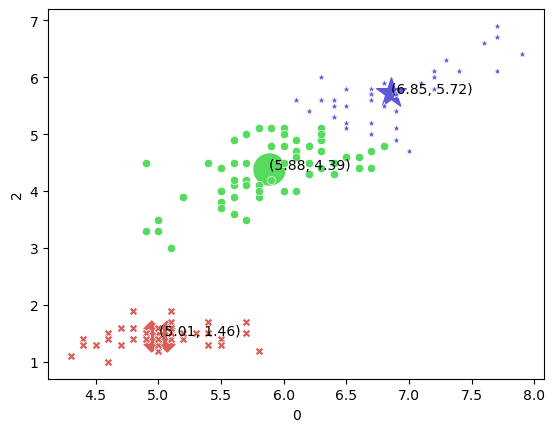

In [168]:
clf =kMeansClustering( n_cluster=3,  n_iterations=10)
fig = clf.fit(X_data, plot=True, index_plot=[0,2])

# Dependence of cost with nclusters

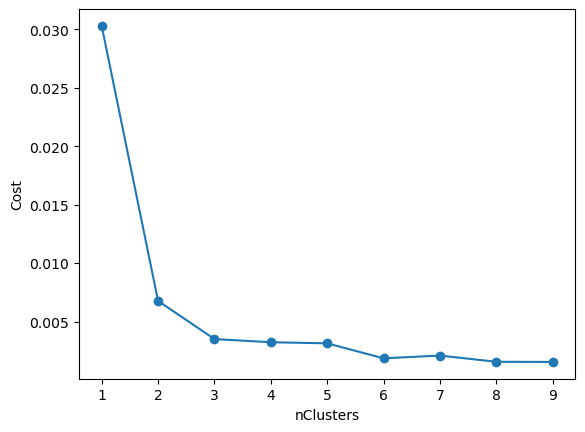

In [154]:
X_data =  data['data']
cost = []
ncls= [1,2,3,4,5,6,7,8,9]
for nclusters in ncls:
    clf =kMeansClustering(n_cluster= nclusters,  n_iterations=10)
    clf.fit(X_data)
    cost.append(clf.cost)
plt.plot(ncls,cost, '-o')
plt.xlabel('nClusters')
plt.ylabel('Cost')

plt.show()

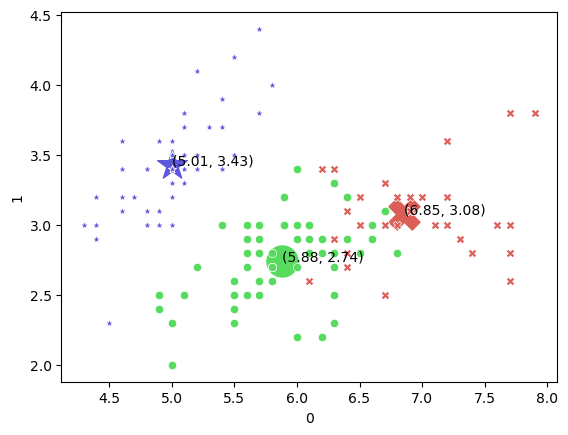

3 0.0035076137654320994


In [157]:
nclusters = 3
clf =kMeansClustering(n_cluster= nclusters,  n_iterations=10)
clf.fit(X_data, plot=True, index_plot=[1,2])
cost  = clf.cost
print(nclusters,cost)

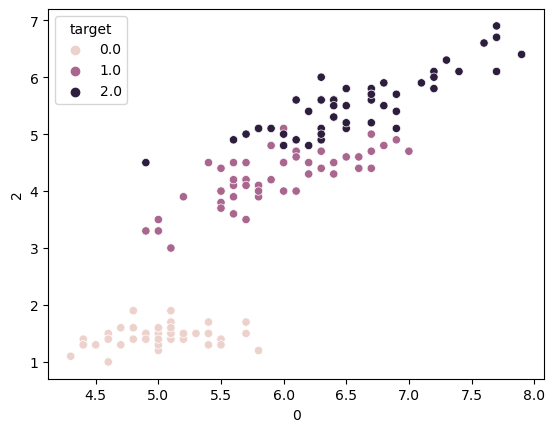

In [167]:
df = pd.DataFrame(np.hstack((data['data'],data['target'].reshape(150,1))),columns=[0,1,2,3,'target'])
sns.scatterplot(data=df,x=0,y=2,hue='target')
plt.show()